In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA  

In [58]:
data = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv")
data.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [60]:
data[["Merchant", "ID"]] = data["merchant_id"].str.split("_", expand=True)
train = data.drop(['merchant_source_name','settlement_period',
                      'working_type','mcc_id','merchant_segment','Merchant','merchant_id'], axis=1)
train

,month_id,net_payment_count,ID
0,202307,15106,43992
1,202301,16918,43992
2,202305,13452,43992
3,202308,16787,43992
4,202302,12428,43992


In [59]:
train = train.sort_values(by=[ 'month_id'])
train.head(10)


,net_payment_count,ID
month_id,,
2020-01-01,6,66740
2020-01-01,6,16495
2020-01-01,43,29820
2020-01-01,3,6241
2020-01-01,136,18208
2020-01-01,3,48579
2020-01-01,10,31409
2020-01-01,10,56433
2020-01-01,3,36786


In [46]:
train["month_id"] = pd.to_datetime(train["month_id"], format="%Y%m")
train.set_index('month_id', inplace=True)

train.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [61]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [62]:
unique_ids = train['ID'].unique()

for merchant_id in unique_ids:
    data = train[train['ID'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])
    #adfuller( merchant_data.net_payment_count.dropna())
    #adftest = ndiffs(merchant_data.net_payment_count, test = 'adf')  

    adfuller(merchant_data)


ValueError: x is required to have ndim 1 but has ndim 2

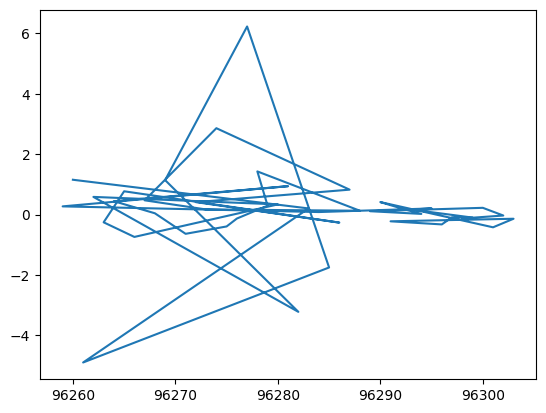

In [63]:
data = train[train['ID'] == '33179' ]
merchant_data = data.sort_values(by=['month_id'])
merchant_data
# Log dönüşümü yapın
ts_log = np.log(merchant_data['net_payment_count'])
#plt.plot(ts_log)

# İlk farkı alın (differencing)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)


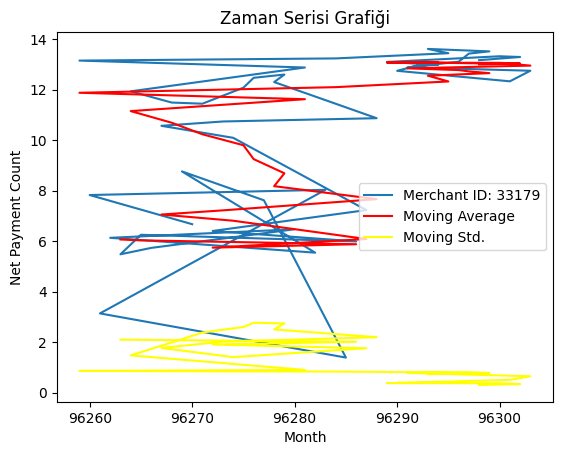

In [64]:
def plot_merchant(train, id):
    data = train[train['ID'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(train,'33179')

In [65]:
def plot_merchant(train, id):
    data = train[train['ID'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    result = adfuller(merchant_data.net_payment_count.dropna())
    print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
    print('p-value: %f' % res[1])   


plot_merchant(train,'33179')

Augmented Dickey-Fuller Statistic: -1.799662
p-value: 0.380630


In [50]:
merchant_data

,net_payment_count,ID
month_id,,
2020-01-01,6,66740
2020-02-01,4,66740
2020-03-01,4,66740
2020-04-01,3,66740
2020-05-01,5,66740
2020-06-01,5,66740
2020-07-01,4,66740
2020-08-01,5,66740
2020-09-01,4,66740


<Axes: >

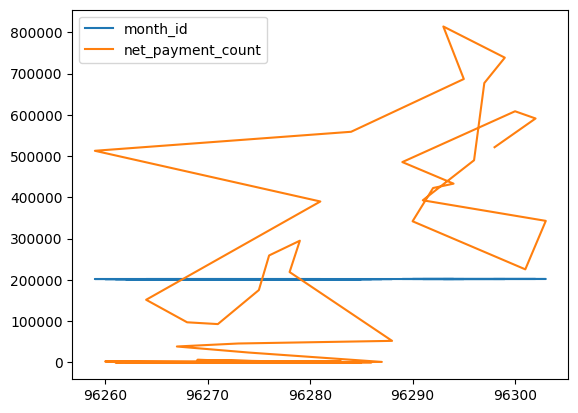

In [68]:
merchant_data.plot()

In [ ]:
train['month_id'] = pd.to_datetime(train['month_id'], format='%Y%m').dt.strftime('%Y-%m')
#train['ID'] = train['ID'].astype('int')
#train['month_id'] = pd.to_datetime(train['month_id'], format='%Y-%m').dt.tz_localize(None)

In [ ]:
train['month_id'] = train['month_id'].astype('datetime64[ns]')
#train.set_index('month_id', inplace=True)

train.info()


In [ ]:
train

In [67]:
def plot_merchant(train, id):
    data = train[train['merchant_id'] == id]
    merchant_data = data.sort_values(by=['month_id'])
    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(train,'merchant_33179')

KeyError: 'merchant_id'

In [ ]:
def forecast_merchant(merge_df, merchant_id, forecast_periods=3):
    data = merge_df[merge_df['merchant_id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(2, 1, 2))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)

    # Grafik üzerinde gösterim
    plt.plot(ts_log, label=f'Merchant ID: {merchant_id}')
    plt.plot(np.exp(results_ARIMA.fittedvalues), color='red', label='Fitted Values')
    plt.plot(forecast_df, color='green', linestyle='--', label='Forecast')
    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('ARIMA Modeli Tahminleri')

    plt.show()

# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(merge_df, 'merchant_33179', forecast_periods=3)

In [ ]:
def forecast_merchant(merge_df, merchant_id, forecast_periods=3):
    data = merge_df[merge_df['merchant_id'] == merchant_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(2, 1, 2))  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=forecast_periods)

    # Tahminleri indeks ile eşleştirin
    forecast_index = pd.date_range(start=ts_log.index[-1], periods=forecast_periods+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {merchant_id}:\n")
    print(forecast_df)


# Belirli bir 'id' için 3 aylık tahmin yapın
forecast_merchant(merge_df, 'merchant_33179', forecast_periods=3)

In [ ]:
def forecast_all_merchants(merge_df, forecast_periods=3):
    unique_ids = merge_df['merchant_id'].unique()

    for merchant_id in unique_ids:
        forecast_merchant(merge_df, merchant_id, forecast_periods)

# Tüm merchant'lar için 3 aylık tahmin yapın
forecast_all_merchants(merge_df, forecast_periods=3)

In [ ]:
merchant_id = 'merchant_33179'
data = merge_df[merge_df['merchant_id'] == merchant_id]
merchant_data = data.sort_values(by=['month_id'])

ts_log = np.log(merchant_data['net_payment_count'])

# ARIMA modelini oluşturun ve eğitin
model = sm.tsa.ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit()

# Tahminleri alın
forecast = results_ARIMA.get_forecast(steps=3)

# Tahminleri indeks ile eşleştirin
ts_log.index = pd.to_datetime(ts_log.index)
forecast_index = pd.date_range(start=ts_log.index[-1], periods=3+1, freq='MS')[1:]
#forecast_index = forecast_index.strftime('%Y-%m')

forecast_values = np.exp(forecast.predicted_mean)
# Tahminleri DataFrame olarak oluşturun
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
}, index=forecast_index)

# Tahminleri göster
print(f"Forecast for Merchant ID {merchant_id}:\n")
print(forecast_df)

In [ ]:
unique_ids = merge_df['merchant_id'].unique()
all_forecasts = pd.DataFrame()

for unique_id in unique_ids:
    data = merge_df[merge_df['merchant_id'] == unique_id]
    merchant_data = data.sort_values(by=['month_id'])

    ts_log = np.log(merchant_data['net_payment_count'])

    # ARIMA modelini oluşturun ve eğitin
    model = sm.tsa.ARIMA(ts_log, order=(2, 1, 2))
    #fit1 = model.fit(x_train,y_train) #update
  
    results_ARIMA = model.fit()

    # Tahminleri alın
    forecast = results_ARIMA.get_forecast(steps=3)

    # Tahminleri indeks ile eşleştirin
    ts_log.index = pd.to_datetime(ts_log.index)

    forecast_index = pd.date_range(start=ts_log.index[-1], periods=3+1, freq='MS')[1:]
    #forecast_index = forecast_index.strftime('%Y-%m')

    forecast_values = np.exp(forecast.predicted_mean)
    # Tahminleri DataFrame olarak oluşturun
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
    }, index=forecast_index)

    # Tahminleri göster
    print(f"Forecast for Merchant ID {unique_id}:\n")
    print(forecast_df)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

merchant_data = merge_df[merge_df['ID'] == 33179]

data = merchant_data['net_payment_count']
#seasonal = False

model = pm.auto_arima(data, 
                      m=12,               # frequency of series                      
                      seasonal=True,  # TRUE if seasonal series
                      d=1,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3,   # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

#print model summary
print(model.summary())

In [ ]:
model.summary()


In [ ]:
ts_log = np.log(merge_df['net_payment_count'])
ts_log

In [ ]:
# Sıfır veya negatif değerleri bir sabit değer ekleyerek düzeltme
merge_df['net_payment_count'] = merge_df['net_payment_count'].apply(lambda x: x + 1 if x <= 0 else x)

# Sıfır veya negatif değerlere sahip satırları filtreleme
merge_df = merge_df[merge_df['net_payment_count'] > 0]
ts_log = np.log(merge_df['net_payment_count'])


In [ ]:
net_payment_count_id = merge_df[merge_df['ID'] == 43992][['net_payment_count']]

df_log = np.log(net_payment_count_id['net_payment_count'] + 1)

plt.plot(df_log)

In [ ]:
moving_avg = df_log.rolling(12).mean()
moving_avg

In [ ]:
ts_log_diff = df_log - df_log.shift()
ts_log_diff

In [ ]:
plt.figure(figsize=(22,4))
sns.lineplot(data = merge_df.reset_index(), x="month_id", y="net_payment_count")

In [69]:
df = train[train['merchant_id'] == 'merchant_66740'].sort_values(by=['month_id'])
df

KeyError: 'merchant_id'

In [ ]:
df.plot()


In [ ]:
model = sm.tsa.ARIMA(ts_log_diff, order=(0, 1, 1))
results_ARIMA = model.fit()

In [ ]:
forecast = results_ARIMA.get_forecast(steps=3)
forecast_index = pd.date_range(start=ts_log_diff.index[-1], periods=4, freq='MS')[1:]

forecast_values = np.exp(forecast.predicted_mean)
forecast_df = pd.DataFrame({
    'Forecast': forecast_values,
}, index=forecast_index)
print(forecast_df)